<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

# MACHINE LEARNING

## Trabalho 02: Gradient Boosting Regressor 
### Grupo:
- Lucas Alexandre 
- Fernando Costa

# 1 - Gradient Boosting Regressor

Nesse tópico, explicaremos o que é e para que usar o Gradient Boosting Regressor. No tópico subsquetente, faremos uso dele para elaborar um projeto real.

### 1.1 - O que é regressão?
A regressão é uma ferramenta bastante utilizada em Aprendizado de máquina na qual traçamos funções em gráficos e a partir desta partimos de um valor médio para a comparação/classificação de cada novo ponto dado na predição. O exemplo mais conhecido deste tipo de algoritmo é a Regressão Linear(*Linear Regression*), na qual a linha traçada é uma reta, como podemos ver no exemplo da Figura 1, e daí o fato de ser chamada de linear.

<div align='left' style="width:500;height:420px;overflow:hidden;">
<a href='https://stats.stackexchange.com/questions/203872/what-to-do-when-a-linear-regression-gives-negative-estimates-which-are-not-possi'>
<img align='left' style='display: block;height: 100%' src='linearregression.png' alt='Linear Regression Example' title='Linear Regression Example'/>

</a>

</div>
<p align="left" style="margin-left:285px;">(Figura 1)</p>

### 1.2 - O que é o Gradient Boosting?
Gradient Boosting é uma técnica de *Machine Learning* utilizada para resolver problemas relacionados a Regressão e classificação. O mesmo produz um modelo de predição baseado na mesclagem de diferentes árvores de decisão, como pode ser visto na figura 2, feitas a partir de cada *feature* dos elementos de partida, e o mesmo pode ser utilizado de várias formas, sendo uma delas usá-lo para gerar um perfil padrão com o qual poderemos comparar os elementos dados para predição e tirar conclusões sobre os mesmos, exatamente o que será apresentado a seguir.

<div align='left' style="width:500;height:420px;overflow:hidden;">
<a href='https://pt.slideshare.net/DataRobot/gradient-boosted-regression-trees-in-scikitlearn'>
<img align='left' style='display: block;height: 100%' src='gradientboosting.jpg' alt='Gradient Boosting Example' title='Gradient Boosting Example'/>

</a>

</div>
<p align="left" style="margin-left:285px;">(Figura 2)</p>

### 1.3 - O que é o Gradient Boosting Regressor?
Agora, visto que já lhes foi apresentado o que significa uma Regressão e também o Gradient Boosting, podemos definir o que é um Gradient Boosting Regressor. A partir das diferentes árvores de decisão criadas pelo Gradient Booster montamos um padrão para o tipo de elemento que estamos estudando, no nosso caso a seguir imóveis, e utilizando o conceito de Regressão estimamos a proximidade de cada predição com o modelo montado previamente através do gráfico feito especificamente para os parâmetros dados.



# 2 - Projeto com o Gradient Boosting Regressor

## Objetivo do projeto:

Nossa ideia foi usar o Gradient Boosting Regressor como uma ferramenta para conseguir prever os preços dos apartamentos à venda em Copacabana e compará-los com seus valores reais, verificando assim quais estão acima ou abaixo do preço. Dividiremos esse tópico em subtópicos onde explicaremos sobre nosso dataset, faremos diferentes tipos de implementações usando o mesmo algoritmo de predição (GradientBoostingRegressor do sklearn) e analisaremos os resultados.

## 2.1 - Dataset
- ZapImóveis: dados de todos os apartamentos a venda no ZapImóveis que estão situados em Niteroi e no Rio. Dentre os atributos que possuímos, os que usamos na predição e/ou visualização foram: id do imóvel, latitude e longitude, rua, bairro, preço de venda, area util, dormitórios, suites e vagas na garagem.
- Onde Fui Roubado: possuímos os dados de todos os assaltos que aconteceram em Niterói e no Rio de Janeiro(que foram registrados no site).
- Open Street Maps: possuímos restaurantes e escolas, com suas respectivas coordenadas, situados no Rio.

Obs1: Esses dados foram juntados. Para cada apartamento nós temos, além dos atributos citados acima em 'ZapImóveis', também possuímos o número de assaltos, restaurantes e escolas em um raio de 1km em relação ao apartamento.

Obs2: Os dados foram minerados na Iniciação Científica, por isso não coloquei todos os arquivos em anexo. Enviei apenas os que são necessários para visualização dos resultados.

Abaixo, abriremos e organizaremos nosso Dataset, usando o pandas:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../../PycharmProjects/NetVis/data/processed/zap_with_ext_features.csv',
                 encoding='utf-8', low_memory=False)

df = df.loc[df.areautil < 1000, ['coordenadas_longitude',
                                 'coordenadas_latitude',
                                 'endereco_logradouro',
                                 'endereco_bairro',
                                 'zapid',
                                 'precovenda',
                                 'areautil',
                                 'dormitorios',
                                 'suites',
                                 'vagas',
                                 'school_em_raio_de_1km',
                                 'restaurant_em_raio_de_1km',
                                 'assaltos_r_1km_2016'
                              ]]

df = df.dropna(axis=0, how='any') #Retirando os NaN

## 2.2 - Implementação dos algoritmos de predição

Esse subtópico será dividido em outros três subtópicos, que diferem entre si na forma como ensinaremos nosso algoritmo a prever os preços dos apartamentos de Copacabana.

In [2]:
from sklearn.ensemble import GradientBoostingRegressor #Importando a API usada

### 2.2.1 - Predição Simples
- Para ensinar o algoritmo nessa implementação, nós convertemos os dados de todos os apartamentos que possuímos (tanto do Rio quanto de Niterói) em uma matriz do Numpy, e utilizamos a matriz no método 'Fit'. Depois, no predict, mandamos apenas a matriz dos apartamentos situados no bairro de Copacabana e obtivemos resultados que serão analisádos posteriormente.

In [3]:
# Y_Simples = array com o preço de todos os imóveis
Y_Fit_Simples = df['precovenda'].values    

#X_Simples = matriz com os atributos de todos os imóveis
X_Fit_Simples = df[['areautil','dormitorios','suites', 'vagas',
        'school_em_raio_de_1km', 'restaurant_em_raio_de_1km',
        'assaltos_r_1km_2016']].as_matrix()

#df_aux = dataframe apenas com os aps de Copacabana
df_aux = df[df['endereco_bairro'] == 'COPACABANA'] 

#Y_Original_Simples = array com o preço dos imóveis situados apenas em Copacabana
Y_Original_Simples = df_aux['precovenda'].values

#X_Predict_Simples = matriz com os atributos dos imóveis situados apenas em Copacabana
X_Predict_Simples = df_aux[['areautil','dormitorios','suites', 'vagas',
        'school_em_raio_de_1km', 'restaurant_em_raio_de_1km',
        'assaltos_r_1km_2016']].as_matrix()

#Ensinando o algoritmo e obtendo os resultados
GBR = GradientBoostingRegressor()
GBR.fit(X_Fit_Simples, Y_Fit_Simples)
resp_Simples = GBR.predict(X_Predict_Simples) 

#Os dados feitos abaixo só serão utilizados posteriormente na visualização dos resultados, contudo ja organizei
#eles agora
lat_Simples = df_aux['coordenadas_latitude'].values
long_Simples = df_aux['coordenadas_longitude'].values
zapid_Simples = df_aux['zapid'].values

### 2.2.2 - Predição um pouco mais elaborada
- A diferença desse algoritmo para o escrito acima é que nessa implementação passamos apenas os dados dos apartamentos situados em Copacabana para o método 'fit', ou seja, ensinamos nosso algoritmo apenas com os dados dos apartamentos situados nesse bairro. Depois, no tópico de análise dos resultados, explicaremos melhor o porque fizemos isso.

In [4]:
#Criamos um dataframe auxiliar apenas com os dados dos aps de Copacabana
df_aux = df[df['endereco_bairro'] == 'COPACABANA']

#Y_Pouco_Elaborado = array com o preço de todos os aps de Copa
Y_Pouco_Elaborado = df_aux['precovenda'].values

#X_Pouco_Elaborado = matriz com os dados dos aps de Copa
X_Pouco_Elaborado = df_aux[['areautil','dormitorios','suites', 'vagas',
        'school_em_raio_de_1km', 'restaurant_em_raio_de_1km',
        'assaltos_r_1km_2016']].as_matrix()

#Ensinando o algoritmo e obtendo os resultados
GBR = GradientBoostingRegressor()
GBR.fit(X_Pouco_Elaborado, Y_Pouco_Elaborado)
resp_Pouco_Elaborado = GBR.predict(X_Pouco_Elaborado)

#Os dados feitos abaixo só serão utilizados posteriormente na visualização dos resultados
lat_Pouco_Elaborado = df_aux['coordenadas_latitude'].values
long_Pouco_Elaborado = df_aux['coordenadas_longitude'].values
zapid_Pouco_Elaborado = df_aux['zapid'].values

### 2.2.3 - Predição mais elaborada
- Nessa implementação, nós levaremos novamente em conta apenas os apartamentos em Copacabana. Contudo, devido a variância de preço dentro do próprio bairro (será melhor explicado na análise dos resultados), separaremos os dados em apartamentos situados na Avenida Atlântica (orla da praia) e o resto.

In [5]:
#Criamos um dataframe auxiliar apenas com os dados dos aps de Copacabana situados na Avenida Atlantica (orla)
df_aux01 = df[(df['endereco_bairro'] == 'COPACABANA') & (df['endereco_logradouro'] == 'AVENIDA ATLANTICA')]

Y_Elaborado01 = df_aux01['precovenda'].values
X_Elaborado01 = df_aux01[['areautil','dormitorios','suites', 'vagas',
        'school_em_raio_de_1km', 'restaurant_em_raio_de_1km',
        'assaltos_r_1km_2016']].as_matrix()

GBR = GradientBoostingRegressor()
GBR.fit(X_Elaborado01, Y_Elaborado01)
resp_Elaborado01 = GBR.predict(X_Elaborado01)

lat_Elaborado01 = df_aux01['coordenadas_latitude'].values
long_Elaborado01 = df_aux01['coordenadas_longitude'].values
zapid_Elaborado01 = df_aux01['zapid'].values


#Criamos outro dataframe auxiliar apenas com os dados dos aps de Copa que não estão situados na Av. Atlantica.
df_aux02 = df[(df['endereco_bairro'] == 'COPACABANA') & (df['endereco_logradouro'] != 'AVENIDA ATLANTICA')]

Y_Elaborado02 = df_aux02['precovenda'].values
X_Elaborado02 = df_aux02[['areautil','dormitorios','suites', 'vagas',
        'school_em_raio_de_1km', 'restaurant_em_raio_de_1km',
        'assaltos_r_1km_2016']].as_matrix()

GBR = GradientBoostingRegressor()
GBR.fit(X_Elaborado02, Y_Elaborado02)
resp_Elaborado02 = GBR.predict(X_Elaborado02)

lat_Elaborado02 = df_aux02['coordenadas_latitude'].values
long_Elaborado02 = df_aux02['coordenadas_longitude'].values
zapid_Elaborado02 = df_aux02['zapid'].values

## 2.3 - Análise dos resultados

Em nossa primeira análise, criaremos 3 mapas onde plotaremos os pontos dos apartamentos situados em Copacabana (um para cada implementação que fizemos). Nesse mapa, poderemos diferenciar apartamentos acima, abaixo ou no preço a partir da cor do ponto, além de visualizar seu valor real de venda e o valor que nosso algoritmo preveu.

In [6]:
"""
    Os mapas serão criados em um arquivo html, a partir de bibliotecas em javascript.
Para facilitar o precesso de plot dos pontos no mapa, criarei diferentes Json(s) e 
usarei eles para plotar os pontos.
    Obs: a lógica para verificar se eles estão acima ou abaixo do preço envolve um range de tolerância.
Se um apartamento tem seu preço previsto dentro de um intervalo de 15% acima ou abaixo do preço original,
ele será considerado na faixa de preço. Esse valor para o range se da pelo fato de que existem outros
fatores que podem interferir no preço dos imóveis, além dos que possuímos em noto dataset. Ou seja, usamos
ele para tentar minimizar a taxa de erro de nosso algoritmo.
"""
import json
def createJsonFile(resp, Y, zapid, long, lat, nameFile):
    json2 = []
    for i in range(len(Y)):
        if ((Y[i] - resp[i]) / Y[i] < -0.15):
            color = "green"
        elif (((Y[i] - resp[i]) / Y[i] > 0.15)):
            color = "red"
        else:
            color = "yellow"

        dict_example = {
            "type": "Feature",
            "properties": {
                "zapid": zapid[i],
                "real_price": str(int(Y[i])),
                "predict_price": str(int(resp[i]))
            },
            "geometry": {
                "type": "Point",
                "coordinates": [long[i], lat[i]],
                "color": color
            }
        }
        json2.append(dict_example)

    f = open(nameFile+".json", "w")
    f.write(json.dumps(json2))
    f.close()
    
createJsonFile(resp_Simples, Y_Original_Simples, zapid_Simples, long_Simples, lat_Simples, "Simples")
createJsonFile(resp_Pouco_Elaborado, Y_Pouco_Elaborado, zapid_Pouco_Elaborado, long_Pouco_Elaborado, lat_Pouco_Elaborado, "PoucoElaborado")
createJsonFile(resp_Elaborado01, Y_Elaborado01, zapid_Elaborado01, long_Elaborado01, lat_Elaborado01, "Elaborado01")
createJsonFile(resp_Elaborado02, Y_Elaborado02, zapid_Elaborado02, long_Elaborado02, lat_Elaborado02, "Elaborado02")

### 2.3.1 - Análise da implementação mais simples

- Abaixo, plotamos no mapa os apartamentos situados em Copabana. Em vermelho estão os apartamentos que nosso código considerou acima do preço, em amarelo os que estão na faixa de preço e o verde que estão abaixo do preço (explicamos como definimos se um apartamento está acima, abaixo ou na faixa de preço nos comentários da função 'createJsonFile', que já foi escrito acima). Caso queira visualizar o preço original do apartamento e o que nosso algoritmo preveu, basta clicar em qualquer um dos pontos.

In [7]:
#Se não aparecer o mapa, rode denovo essa label
#Obs: necessária conexão com a internet, devido a bibliotecas .js usadas no html
from IPython.display import IFrame
IFrame('Simples.html', width=900, height=400)

- Analisando visualmente o mapa, percebemos que existe uma grande quantidade de apartamentos acima do preço (em vermelho) próximo a orla da praia e uma quantidade consideravel de apartamentos abaixo do preço (verde) mais distante da orla. Para tentarmos entender esse fato, precisamos relembrar como o algoritmo foi implementado.
- Método FIT: nesse método, nós mandamos como o parâmetro de 'X' uma matriz com os atributos de TODOS os apartamentos que pussuíamos a nossa disposição (Rio e Niterói) e no 'Y' os seus respectivos preços reais. Com isso, o Gradient Boosting Regressor aprendeu a prever o preço de apartamenos sem levar em consideração a geolocalidade do imóvel. Sabemos que isso implica negativamente em nossos resultados, já que um imóvel situado em Bangu não custaria o mesmo valor se ele estivesse em Copa. Isso explica o fato de possuirmos uma grande quantidade de imóveis em vermelho, já que Copacabana é um dos bairros mais valorizados do estado do Rio.

### 2.3.2 - Análise da implementação um pouco mais elaborada

- Analisando o mapa abaixo, vemos que agora o número de apartamentos abaixo e acima do preço diminuíram e ficaram melhores espalhados. Contudo, ainda  continuamos tendo uma quantidade significativa de apartamentos em vermelho na orla da praia, e verde mais distantes da mesma. Novamente, tentaremos entender o porquê desse fato se repetir analisando como o algoritmo foi implementado.

In [8]:
#Se não aparecer o mapa, rode denovo essa label
#Obs: necessária conexão com a internet, devido a bibliotecas .js usadas no html
from IPython.display import IFrame
IFrame('PoucoElaborado.html', width=900, height=400)

- Método FIT: nesse método, nós mandamos como parâmetro de 'X' uma matriz com atributo apenas dos apartamentos situados em Copacabana e 'Y' os seus respectivos preços reais. Com isso, o Gradient Boosting Regressor aprendeu a prever o preço de apartamentos a partir apenas dos imóveis situados em Copacabana. Como nossa intenção é apenas prever os preços de apartamentos nessa localidade, nosso algoritmo recebeu menos dados se comparado ao algoritmo anterior, mas com dados que representam melhor como funciona o mercado nesse bairro. Por isso conseguimos notar uma melhora no resultado final. Contudo, dentro do próprio bairro (Copa), a forma como se calcula o preço dos apartamentos podem variar. Um apartamento com determinados atributos situados distante da orla provavelmente não custará o mesmo preço que um mesmo apartamento situado na orla da praia (Avenida Atlântica). Com isso, entendemos melhor o porque de termos bastante apartamentos acima do preço na orla e abaixo do preço distantes da orla, já que nós não levamos em consideração esse parâmetro geoespacial na hora de ensinar o algoritmo.

### 2.3.3 - Análise da implementação mais elaborada

- Analisando o mapa abaixo, percebemos que nossos resultados agora parecem estar bem mais satisfatórios. A quantidade de apartamentos que estão na faixa de preço aumentaram bastante, enquanto apartamentos acima e baixo do preço diminuiram para uma quantidade que parece condizer melhor com a realidade. Para explicar o porque dessa mudança, teremos que explicar novamente como foi implementado o método fit.

In [9]:
#Se não aparecer o mapa, rode denovo essa label
#Obs: necessária conexão com a internet, devido a bibliotecas .js usadas no html
from IPython.display import IFrame
IFrame('Elaborado.html', width=900, height=400)

- Método FIT01: nesse método, nós mandamos como parâmetro de 'X' uma matriz com atributo apenas dos apartamentos situados em Copacabana e na Avenida Atlantica (orla da praia), e no 'Y' os seus respectivos preços reais.
- Método FIT02: nesse método, nós mandamos como parâmetro de 'X' uma matriz com atributo apenas dos apartamentos situados em Copacabana e e que não estão na Avenida Atlantica, e no 'Y' os seus respectivos preços reais.
- Utilizando o Gradient Boosting Regressor duas vezes com dados diferentes, conseguimos prever melhor os aparamentos que estão situados apenas na orla da praia (normalmente custam mais caro) e também os que não estão na orla, já que antes eles tinham seus preços previstos afetados devido aos altos preços dos apartamentos da orla. Com isso dentro do próprio bairro, nós separamos a forma como aprendemos a prever o preço de apartamenos na orla e fora dela, e com isso obtivemos resultados que parecem condizer melhor com a realidade.

- Sabemos que mesmo com esse algoritmo mais bem implementado, ele ainda está longe do ideal. Contudo, não conseguimos implementar outras idéias devido ao tempo e a falta de conhecimentos prévios, devido ao fato de estarmos ainda na graduação. Esperamos continuar o projeto mesmo após o fim da disciplina, já que achamos a idéia interessante e passível de se obter resultados mais satisfatórios.

### 2.3.4 - Análise gráfica de todas as implementações

In [10]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
"""
    Essa função retornarar um vetor de 3 posições, onde o indice 0 é o número de aps abaixo do preço(verde),
o indice 1 é o número de aps na faixa de preço (amarelo) e o indice 2 são os aps acima do preço (vermelho).
    Lembrando que ele retorna esses resultados a partir dos arquivos ja criados nas funções anteriores.
"""
def quantosAps(file_name):
    cores = [0, 0, 0] #Verde, amarelo e vermelho
    with open(file_name+'.json') as data_file:    
        data = json.load(data_file)
    data_file.close()
    for i in data:
        if(i['geometry']['color'] == "green"):
            cores[0] += 1
        elif(i['geometry']['color'] == "yellow"):
            cores[1] += 1
        else:
            cores[2] += 1
    return cores
"""
    Essa função cria e plota o gráfico para visualização.
"""
def createGraph(name_file, name_file2, titulo):
    fig, ax = plt.subplots()
    nome = ('Abaixo', 'No Preço', 'Acima')
    if name_file2 == '':
        x = quantosAps(name_file)
    else:
        x01 = quantosAps(name_file)
        x02 = quantosAps(name_file2)
        x = [x01[0]+x02[0], x01[1]+x02[1], x01[2]+x02[2]]
    ax.barh([0,1,2], x, align='center', color=['green','yellow','red'])
    ax.set_yticks([0,1,2])
    ax.set_yticklabels(nome)
    ax.set_xlabel('Número de apartamentos')
    ax.set_title(titulo)
    ax.invert_yaxis()

    plt.show()

- #### Implementação Simples

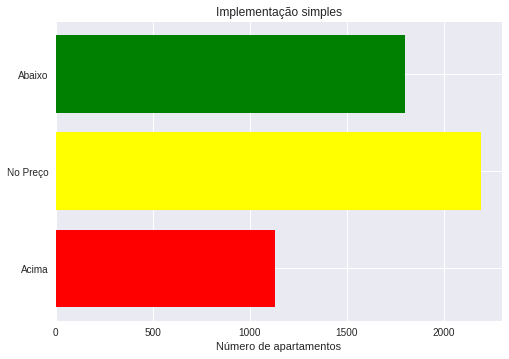

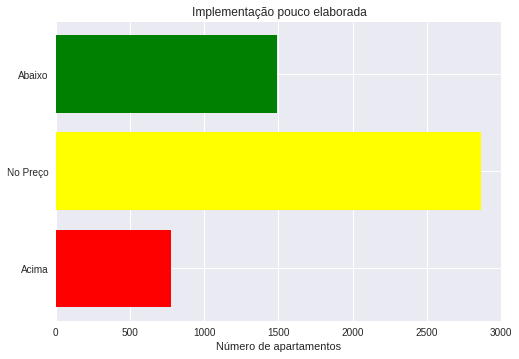

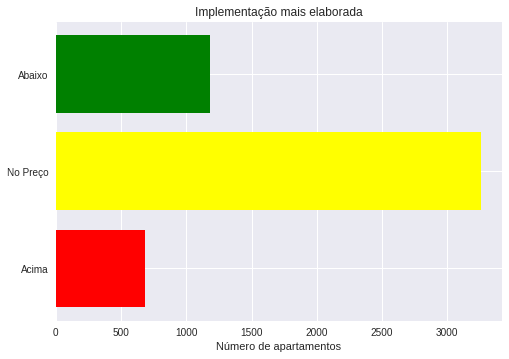

In [11]:
createGraph('Simples','', 'Implementação simples')
createGraph('PoucoElaborado','', 'Implementação pouco elaborada')
createGraph('Elaborado01','Elaborado02', 'Implementação mais elaborada')

- Analisando os 3 gráficos, vemos que o que visualizavamos no mapa estava correto. Na implementação mais elaborada dentre as 3, onde a gente analisa melhor a geoespacialidade do apartamento, temos resultados que parecem estar mais dentro da realidade. Predomina-se o número de apartamentos 'No Preço', contudo existe um número significativo de apartamentos 'Abaixo' (crise econômica do país pode influenciar esse fator) e uma quantidade pequena de apartamentos acima do preço (se comparado aos outros 2 parâmetros).

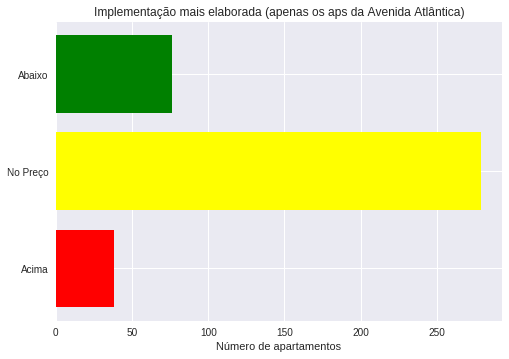

In [12]:
createGraph('Elaborado01', '', 'Implementação mais elaborada (apenas os aps da Avenida Atlântica)')

- No gráfico acima, vemos apenas os apartamentos situados na Av. Atlântica, que no algoritmo mais bem elaborado foi calculado separadamente. Segundo a nossa lógica, eles deveriam apresentar os resultados mais satisfatórios dentre todos, já que apartamentos nessa região tendem a seguir um padrão de cálculo do preço similar.

# 3 - Conclusão

- Ao longo do trabalho, percebemos que existem várias formas de se usar um único tipo de algoritmo de regressão e obter diferentes resultados.
- Também aprendemos que, na hora de por em prática o que aprendemos na teoria no mundo real, surgem diversos problemas. Em nosso projeto, por exemplo, percebemos a alta complexidade de se aprender a prever o preço de um apartamento, devido a esse cálculo não representar uma equação linear e variar mediante a diversos fatores. Demos ênfase no fator geoespacial e vimos como ele pode alterar os resultados, contudo ainda existem diversos fatores que também interferem significativamente nos preços e não foram analisados nesse trabalho.